# Solution to Form #1

In [1]:
[1,2,3]

ans =

   1   2   3



In [8]:
[1,2,3]*[1;2;3]=?

# The first source of error is roundoff error
## Just storing a number in a computer requires rounding

In [11]:
fprintf('realmax = %1.20e\n',realmax)
fprintf('realmin = %1.20e\n',realmin)
fprintf('maximum relative error = %1.20e\n',eps)


realmax = 1.79769313486231570815e+308
realmin = 2.22507385850720138309e-308
maximum relative error = 2.22044604925031308085e-16


In [13]:
s=1;
for i=1:1000
    s=s+eps/10;
end
s==1

ans =  1


# Freefall Model (revisited)
## Octave solution (will run same on Matlab)

Set default values in Octave for linewidth and text size

In [14]:
%plot --format svg

In [15]:
set (0, "defaultaxesfontname", "Helvetica")
set (0, "defaultaxesfontsize", 18)
set (0, "defaulttextfontname", "Helvetica")
set (0, "defaulttextfontsize", 18) 
set (0, "defaultlinelinewidth", 4)

Define time from 0 to 12 seconds with `N` timesteps 
function defined as `freefall`

In [16]:
function [v_analytical,v_terminal,t]=freefall(N)
    t=linspace(0,12,N)';
    c=0.25; m=60; g=9.81; v_terminal=sqrt(m*g/c);

    v_analytical = v_terminal*tanh(g*t/v_terminal);
    v_numerical=zeros(length(t),1);
    delta_time =diff(t);
    for i=1:length(t)-1
        v_numerical(i+1)=v_numerical(i)+(g-c/m*v_numerical(i)^2)*delta_time(i);
    end
    % Print values near 0,2,4,6,8,10,12 seconds
    indices = round(linspace(1,length(t),7));
    fprintf('time (s)|vel analytical (m/s)|vel numerical (m/s)\n')
    fprintf('-----------------------------------------------\n')
    M=[t(indices),v_analytical(indices),v_numerical(indices)];
    fprintf('%7.1f | %18.2f | %15.2f\n',M(:,1:3)');
    plot(t,v_analytical,'-',t,v_numerical,'o-')
end
    

time (s)|vel analytical (m/s)|vel numerical (m/s)
-----------------------------------------------
    0.0 |               0.00 |            0.00
    2.0 |              18.76 |           18.82
    4.0 |              32.64 |           32.80
    6.1 |              40.79 |           40.97
    8.0 |              44.80 |           44.94
   10.0 |              46.84 |           46.93
   12.0 |              47.77 |           47.82


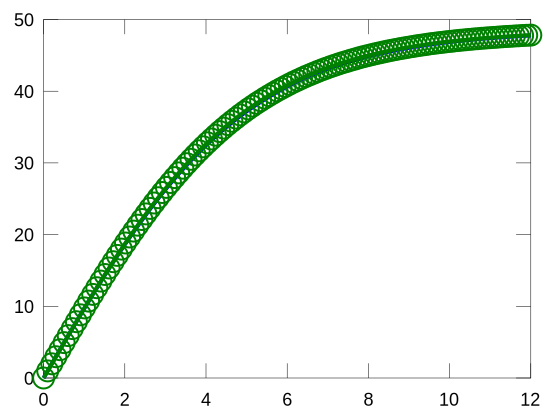

In [19]:
[v_analytical,v_terminal,t]=freefall(120);

# Types of error
## Freefall is example of "truncation error"
### Truncation error results from approximating exact mathematical procedure

We approximated the derivative as $\delta v/\delta t\approx\Delta v/\Delta t$

Can reduce error by decreasing step size -> $\Delta t$=`delta_time`

## Another example of truncation error is a Taylor series (or Maclaurin if centered at a=0)

Taylor series:
$f(x)=f(a)+f'(a)(x-a)+\frac{f''(a)}{2!}(x-a)^{2}+\frac{f'''(a)}{3!}(x-a)^{3}+...$

We can approximate the next value in a function by adding Taylor series terms:

|Approximation | formula |
|---|-------------------------|
|$0^{th}$-order | $f(x_{i+1})=f(x_{i})+R_{1}$ |
|$1^{st}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+R_{2}$ |
|$2^{nd}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^{2}+R_{3}$|
|$n^{th}$-order | $f(x_{i+1})=f(x_{i})+f'(x_{i})h+\frac{f''(x_{i})}{2!}h^{2}+...\frac{f^{(n)}}{n!}h^{n}+R_{n}$|

Where $R_{n}=\frac{f^{(n+1)}(\xi)}{(n+1)!}h^{n+1}$ is the error associated with truncating the approximation at order $n$.

The $n^{th}$-order approximation estimates that the unknown function, $f(x)$, is equal to an $n^{th}$-order polynomial. 

In the Freefall example, we estimated the function with a $1^{st}$-order approximation, so 

$v(t_{i+1})=v(t_{i})+v'(t_{i})(t_{i+1}-t_{i})+R_{1}$

$v'(t_{i})=\frac{v(t_{i+1})-v(t_{i})}{t_{i+1}-t_{i}}-\frac{R_{1}}{t_{i+1}-t_{i}}$

$\frac{R_{1}}{t_{i+1}-t_{i}}=\frac{v''(\xi)}{2!}(t_{i+1}-t_{i})$

or the truncation error for a first-order Taylor series approximation is

$\frac{R_{1}}{t_{i+1}-t_{i}}=O(\Delta t)$


1. digital representation of a number is rarely exact

2. arithmetic (+,-,/,\*) causes roundoff error

In [20]:
fprintf('%1.20f\n',double(pi))
fprintf('%1.20f\n',single(pi))

3.14159265358979311600
3.14159274101257324219
